In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvas
from scipy.spatial import distance
import random
import pickle
from scipy import stats


# allow us to re-use the framework from the src directory
import sys, os
sys.path.append(os.path.abspath(os.path.join('../')))

import max_ent.examples.grid_9_by_9 as G
from max_ent.utility.support import *
from max_ent.gridworld import Directions


random.seed(123)
np.random.seed(123)

In [2]:

n_trajectories = 200
threshold1 = 200
threshold2 = 0.5
threshold3 = 0.5
threshold4 = 0 #this one varies in [-1,1]
threshold5 = 0 #means default w=[1,0]
threshold7 = 0.9


In [3]:
blue = [21,  9, 59,  1,  0, 20]
green = [42, 18, 76, 41, 23, 30]
cs = [63, 74, 13, 39, 48, 38]
ca = [Directions.DOWN_LEFT, Directions.UP_LEFT]
start =7
goal = 65

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11a39c470>}


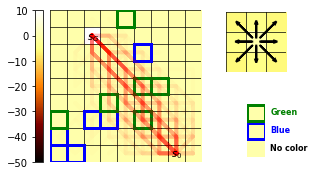

In [4]:
#blue, green, cs, ca, start, goal = generate_constraints(9)
n, n_cfg, demo_n, f1 = create_world('Nominal', blue, green, start=start, goal=goal)

In [5]:
print(blue)
print(green)
print(cs)
print(ca)
print(start)
print(goal)

[21, 9, 59, 1, 0, 20]
[42, 18, 76, 41, 23, 30]
[63, 74, 13, 39, 48, 38]
[DOWN_LEFT, UP_LEFT]
7
65


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11a39c470>}


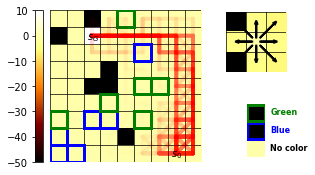

In [6]:
cc = [1, 2]
c, c_cfg, demo_c, f2 = create_world('Constrained', blue, green, cs, ca, cc, start=start, goal=goal, check=True)

In [7]:
from mc.self import *
from mc.system1 import *
from mc.system2 import *

#print(demo_c.trajectories)
modelSelf = ModelSelf(n, c, demo_c)

s1 = System1Solver()
s2 = System2Solver()

modelSelf_s1 = ModelSelf(n, c, demo_c)

s1_only = System1Solver()
s2_only = System2Solver()


In [8]:
from mc.mca import *
from max_ent.algorithms.gridworld_icrl import Demonstration

mca = MCA(s1,s2,modelSelf, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold5 = threshold5, threshold7 = threshold7)
demo_mca = mca.generate_trajectories(n_trajectories)


/Users/aloreggia/Documents/GitHub/wmca/mc/self.py:237: RuntimeWarning: invalid value encountered in double_scalars
  return self.part_reward[state_s_coord] / self.getNTrajectories(state_s)


In [9]:
mca_s1 = MCA(s1_only,s2_only,modelSelf_s1, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, only_s1=True)
demo_mca_s1 = mca_s1.generate_trajectories(n_trajectories)


/Users/aloreggia/Documents/GitHub/wmca/mc/self.py:237: RuntimeWarning: invalid value encountered in double_scalars
  return self.part_reward[state_s_coord] / self.getNTrajectories(state_s)


In [10]:
modelSelf_s2 = ModelSelf(n, c, None)
mca_s2 = MCA(s1_only,s2_only,modelSelf_s2, threshold1=threshold1, threshold2=threshold2, threshold3 = threshold3, threshold5 = threshold5, only_s2=True)
demo_mca_s2 = mca_s2.generate_trajectories(n_trajectories)


/Users/aloreggia/Documents/GitHub/wmca/mc/self.py:237: RuntimeWarning: invalid value encountered in double_scalars
  return self.part_reward[state_s_coord] / self.getNTrajectories(state_s)


{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11a39c470>}


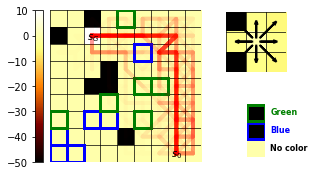

In [11]:
#print(c)
f1 = G.plot_world(f'MCA', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_mca, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11a39c470>}


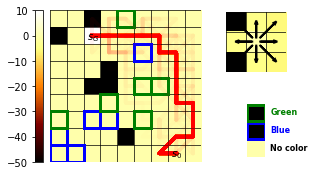

In [12]:
f1_s1 = G.plot_world(f'S1 only', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_mca_s1, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

{'vmin': -50, 'vmax': 10, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x11a39c470>}


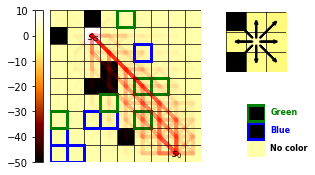

In [13]:
f1_s2 = G.plot_world(f'S2 only', c, c_cfg.state_penalties, 
              c_cfg.action_penalties, c_cfg.color_penalties, 
              demo_mca_s2, c_cfg.blue, c_cfg.green, vmin=-50, vmax=10)

In [14]:
#calcolare percentuale di utilizzo di s1 e s2 su tutte le traiettorie
#calcolare percentuale media di utilizzo di s1 e s2 in ogni traiettoria
#plottare uso di s1 e s2 in un grafo 

#mca.__dict__

{'s1': <mc.system1.System1Solver at 0x12b84c080>,
 's2': <mc.system2.System2Solver at 0x12b9299b0>,
 'modelSelf': <mc.self.ModelSelf at 0x12894add8>,
 'threshold1': 200,
 'threshold2': 0.5,
 'threshold3': 0.5,
 'threshold4': 0,
 'threshold5': 0,
 'threshold6': 1,
 'threshold7': 0.9,
 'usage_s1': 7909,
 'usage_s2': 439,
 'time_usage_s2': 9506,
 'w': [1.0, 0.0],
 'trajectory_stat': [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1],
  [0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   1,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   1],
  [0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   1,
   0,
   0,
   0,
   1,
   1,
   1,
   1,
   0,
   1,
   1],
  [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
  [0,
   1,
   0,
   1,
   1,
   1,
   1,
   

In [15]:
'''
avg_reward_mca = 0
for trajectory in demo_mca.trajectories:
    avg_reward_mca += mca.modelSelf.getTotalReward(trajectory)
    
print(f"{avg_reward_mca/len(demo_mca.trajectories)} su {len(demo_mca.trajectories)}")

avg_reward_c = 0
for trajectory in demo_c.trajectories:
    avg_reward_c += mca.modelSelf.getTotalReward(trajectory)
    
print(f"{avg_reward_c/len(demo_c.trajectories)} su {len(demo_c.trajectories)}")
'''


'\navg_reward_mca = 0\nfor trajectory in demo_mca.trajectories:\n    avg_reward_mca += mca.modelSelf.getTotalReward(trajectory)\n    \nprint(f"{avg_reward_mca/len(demo_mca.trajectories)} su {len(demo_mca.trajectories)}")\n\navg_reward_c = 0\nfor trajectory in demo_c.trajectories:\n    avg_reward_c += mca.modelSelf.getTotalReward(trajectory)\n    \nprint(f"{avg_reward_c/len(demo_c.trajectories)} su {len(demo_c.trajectories)}")\n'

In [16]:
from max_ent.utility.support import *

temp_matrix_c, avg_length_c, avg_reward_c, avg_reward_n_c, avg_violated_c, counters_c = count_states(demo_c.trajectories, c_cfg.mdp, n, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})

temp_matrix_mca, avg_length_mca, avg_reward_mca, avg_reward_n_mca, avg_violated_mca, counters_mca = count_states(demo_mca.trajectories, c_cfg.mdp, n, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})
temp_matrix_mca_s1 = count_states(demo_mca_s1.trajectories, c_cfg.mdp, n, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})
temp_matrix_mca_s2 = count_states(demo_mca_s2.trajectories, c_cfg.mdp, n, {'blue': blue, 'green': green, 'cs':cs, 'ca':ca})

js_divergence(temp_matrix_c,temp_matrix_mca)

print(avg_reward_n_mca)
print(avg_reward_n_c)

print(avg_reward_mca)
print(avg_reward_c)

-132.91888019502778
-125.81031888230049
-178.5858946290547
-134.5603188823005


In [17]:
print(f"Const \t -> Length: {avg_length_c} \t Rew: {avg_reward_c:.4f} \t Viol.: {avg_violated_c} \t Counters: {counters_c}")
print(f"MCA.  \t -> Length: {avg_length_mca} \t Rew: {avg_reward_mca:.4f} \t Viol.: {avg_violated_mca} \t Counters: {counters_mca}")
print(f"Only_S1  -> Length: {temp_matrix_mca_s1[1]} \t Rew: {temp_matrix_mca_s1[2]:.4f} \t Viol.: {temp_matrix_mca_s1[4]} \t Counters: {temp_matrix_mca_s1[5]}")
print(f"Only_S2  -> Length: {temp_matrix_mca_s2[1]} \t Rew: {temp_matrix_mca_s2[2]:.4f} \t Viol.: {temp_matrix_mca_s2[4]} \t Counters: {temp_matrix_mca_s2[5]}")

Const 	 -> Length: 32.77 	 Rew: -134.5603 	 Viol.: 0.175 	 Counters: (0.035, 0.0, 0.055, 0.085)
MCA.  	 -> Length: 33.7 	 Rew: -178.5859 	 Viol.: 0.975 	 Counters: (0.07, 0.545, 0.095, 0.265)
Only_S1  -> Length: 19.8 	 Rew: -82.9708 	 Viol.: 0.205 	 Counters: (0.045, 0.0, 0.05, 0.11)
Only_S2  -> Length: 12.65 	 Rew: -388.3437 	 Viol.: 7.33 	 Counters: (0.71, 5.095, 0.17, 1.355)
